
**Total: 200 Marks**

# ☕ Coffee Shop Revenue Prediction - Regression Models

Welcome! This assignment is designed to help you explore and implement various regression algorithms to predict daily revenue for coffee shops. Follow the instructions below and answer each question with both code and explanations where required.

---

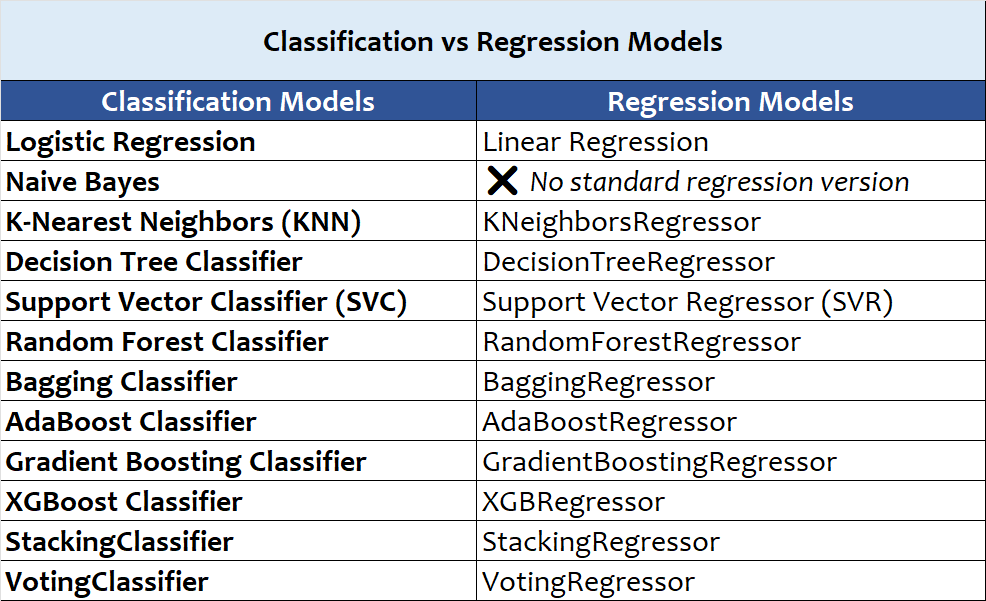

In [142]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
)
from xgboost import XGBRegressor

# Data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base regressors
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}

# Stacking and Voting
stacking = StackingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
], final_estimator=LinearRegression())

voting = VotingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
])

# Add ensemble models
models["Stacking"] = stacking
models["Voting"] = voting

# Evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} - MSE: {mse:.4f}")


Linear Regression - MSE: 0.0110
KNN - MSE: 29328.1654
Decision Tree - MSE: 58060.7864
SVR - MSE: 65938.7418
Random Forest - MSE: 24102.7897
Bagging - MSE: 28206.6529
AdaBoost - MSE: 28373.4044
Gradient Boosting - MSE: 11031.9716
XGBoost - MSE: 17275.9226
Stacking - MSE: 8242.7075
Voting - MSE: 15380.3652


#  Coffee Shop Revenue Dataset

##  About Dataset

This dataset contains **2,000 rows** of data from coffee shops, offering detailed insights into factors that influence **daily revenue**.  
It includes key operational and environmental variables that provide a comprehensive view of how business activities and external conditions affect sales performance.

Designed for use in **predictive analytics and business optimization**, this dataset is a valuable resource for anyone looking to understand the relationship between **customer behavior**, **operational decisions**, and **revenue generation** in the **food and beverage industry**.

---

##  Columns & Variables

The dataset features a variety of columns capturing **operational details**, **customer activity**, and **external factors** such as **marketing spend** and **location foot traffic**.

### 1. `Number of Customers Per Day`
- The total number of customers visiting the coffee shop on any given day.
- **Range:** 50 - 500 customers

### 2. `Average Order Value ($)`
- The average dollar amount spent by each customer during their visit.
- **Range:** $2.50 - $10.00

### 3. `Operating Hours Per Day`
- The total number of hours the coffee shop is open for business each day.
- **Range:** 6 - 18 hours

### 4. `Number of Employees`
- The number of employees working on a given day.
- Can influence service speed, customer satisfaction, and ultimately, sales.
- **Range:** 2 - 15 employees

### 5. `Marketing Spend Per Day ($)`
- The amount of money spent on marketing campaigns or promotions on any given day.
- **Range:** $10 - $500 per day

### 6. `Location Foot Traffic (people/hour)`
- The number of people passing by the coffee shop per hour.
- Indicative of the shop's **location quality** and **potential customer base**.
- **Range:** 50 - 1000 people/hour

---

##  Target Variable

### `Daily Revenue ($)`
- The **dependent variable** representing the total revenue generated by the coffee shop each day.
- It is influenced by customer visits, average spending, marketing spend, and staff availability.
- **Range:** $200 - $10,000 per day




##  1. Load the Data — *[5 Marks]*
- Load the dataset using `pandas`
- Display the first few rows

---

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/coffee_shop_revenue.csv')

In [146]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


##  2. Data Inspection — *[10 Marks]*
- Show the shape of the dataset
- Use `.info()` to display data types and null values
- Show value counts (if applicable)

---

In [147]:
df.shape

(2000, 7)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [149]:
df.value_counts()

Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  Daily_Revenue
495                          9.95                 17                       4                    11.79                    417                    4634.73          1
                             9.63                 12                       3                    356.89                   139                    4881.00          1
                             9.53                 12                       10                   141.32                   238                    4188.80          1
                             9.49                 17                       3                    133.89                   933                    4550.30          1
                             9.32                 10                       10                   172.68                   523                    4388.59          1
                                                                                                                                                                ..
50                           6.15                 12                       9                    76.89                    626                    382.77           1
                             6.14                 10                       6                    294.07                   812                    1046.39          1
                             5.95                 17                       9                    36.83                    675                    110.52           1
                             3.90                 13                       11                   292.70                   629                    525.75           1
                             3.81                 15                       10                   279.21                   285                    833.74           1
Name: count, Length: 2000, dtype: int64


##  3. Data Cleaning — *[15 Marks]*
- Handle missing values (if any)
- Encode categorical variables (if any)
- Convert data types where needed

---

In [150]:
df.isnull().sum()

,0
Number_of_Customers_Per_Day,0
Average_Order_Value,0
Operating_Hours_Per_Day,0
Number_of_Employees,0
Marketing_Spend_Per_Day,0
Location_Foot_Traffic,0
Daily_Revenue,0


In [151]:
# There are no missing values

In [152]:
# There are no categorical variables

In [153]:
df[['Average_Order_Value','Marketing_Spend_Per_Day','Daily_Revenue']] = df[['Average_Order_Value','Marketing_Spend_Per_Day','Daily_Revenue']].astype('int64')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Number_of_Customers_Per_Day  2000 non-null   int64
 1   Average_Order_Value          2000 non-null   int64
 2   Operating_Hours_Per_Day      2000 non-null   int64
 3   Number_of_Employees          2000 non-null   int64
 4   Marketing_Spend_Per_Day      2000 non-null   int64
 5   Location_Foot_Traffic        2000 non-null   int64
 6   Daily_Revenue                2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


##  4. Data Description — *[10 Marks]*
- Use `.describe()` on numerical features
- List unique values for any categorical variables

---

In [155]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,274.296000,5.754500,11.667000,7.947000,252.107500,534.893500,1916.84000
std,129.441933,2.181653,3.438608,3.742218,141.131992,271.662295,976.20721
min,50.000000,2.000000,6.000000,2.000000,10.000000,50.000000,-58.00000
25%,164.000000,4.000000,9.000000,5.000000,129.750000,302.000000,1139.75000
50%,275.000000,6.000000,12.000000,8.000000,250.500000,540.000000,1770.00000
75%,386.000000,8.000000,15.000000,11.000000,375.000000,767.000000,2530.00000
max,499.000000,10.000000,17.000000,14.000000,499.000000,999.000000,5114.00000


In [156]:
# There are no categorical variables

##  5. Univariate Analysis — *[20 Marks]*
- Plot **individual** distributions for all numerical features
  - Use histograms
- Include bar plots for any categorical variables
- Add comments on observed distributions  

---

<Axes: xlabel='Number_of_Customers_Per_Day', ylabel='Count'>

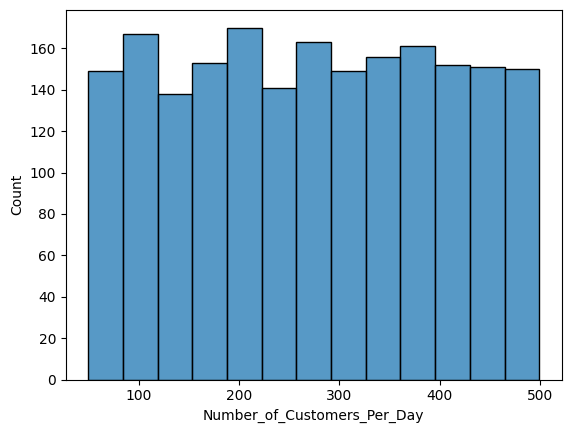

In [157]:
# Number_of_Customers_Per_Day
sns.histplot(df['Number_of_Customers_Per_Day'])

In [158]:
# Observations
# The number of costumers in the coffee shop are consistent
# There are no extreme high or extreme low

<Axes: xlabel='Average_Order_Value', ylabel='Count'>

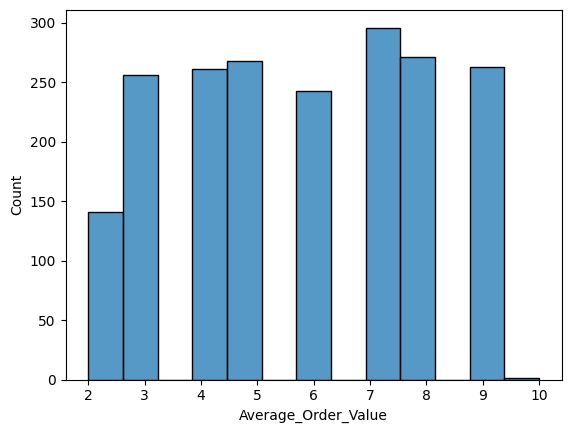

In [159]:
# Average_Order_Value
sns.histplot(df['Average_Order_Value'])

In [160]:
# Observations
# The highest frequency is around the value 7 with around 300 orders
# The lowest frequency is around the value 2 with around 150 orders
# The data is almost uniformly distributed

<Axes: xlabel='Operating_Hours_Per_Day', ylabel='Count'>

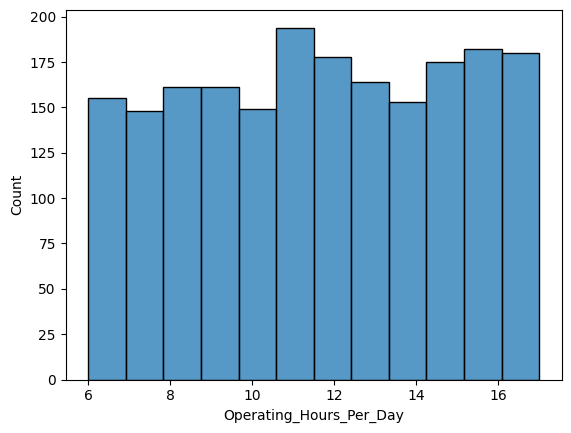

In [161]:
# Operating_Hours_Per_Day
sns.histplot(df['Operating_Hours_Per_Day'])

In [162]:
# Observations
# Mostly the coffee shop is open from 6 to 16 hours a day
# The data is uniformly distributed

<Axes: xlabel='Number_of_Customers_Per_Day', ylabel='Count'>

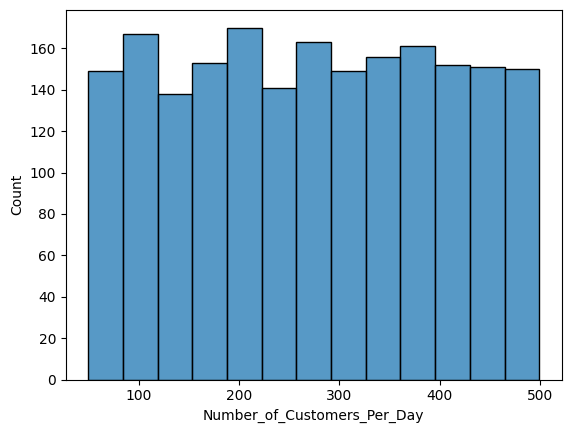

In [163]:
# Number_Of_Employees
sns.histplot(df['Number_of_Customers_Per_Day'])

In [164]:
# Observations
# The number of customers per day is widely spread where from 100 to 500 number of customers visit the coffee shop

<Axes: xlabel='Marketing_Spend_Per_Day', ylabel='Count'>

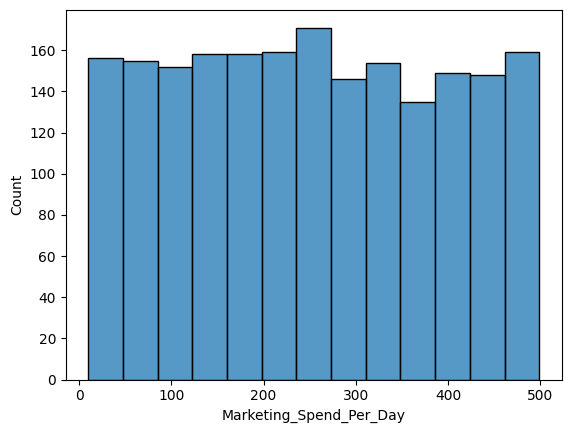

In [165]:
# Marketing_Spend_Per_Day
sns.histplot(df['Marketing_Spend_Per_Day'])

In [166]:
# Observations
# It shows a relatively uniform spread of counts across different spending ranges with each bin containing a similar values

<Axes: xlabel='Location_Foot_Traffic', ylabel='Count'>

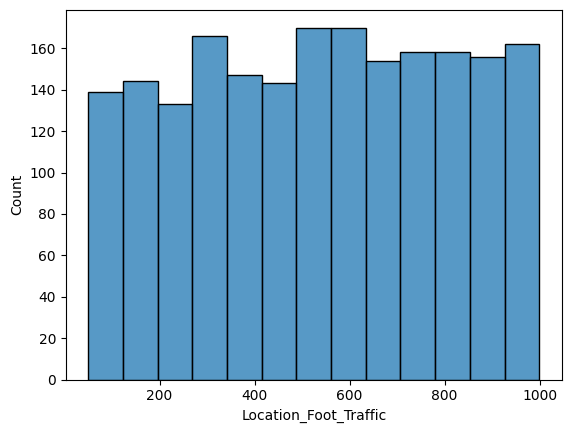

In [167]:
# Location_Foot_Traffic
sns.histplot(df['Location_Foot_Traffic'])

In [168]:
# Observations
# The number of people passing by the coffee shop pe hour is slighty more with 600 people per hour


##  6. Bivariate Analysis — *[20 Marks]*
- Analyze the relationship of each independent variable with `Daily Revenue`
  - Use box plots, violin plots, scatter plots
  - Use `groupby()` for statistical summaries
- Add plots and comments

---

<Axes: xlabel='Number_of_Customers_Per_Day', ylabel='Daily_Revenue'>

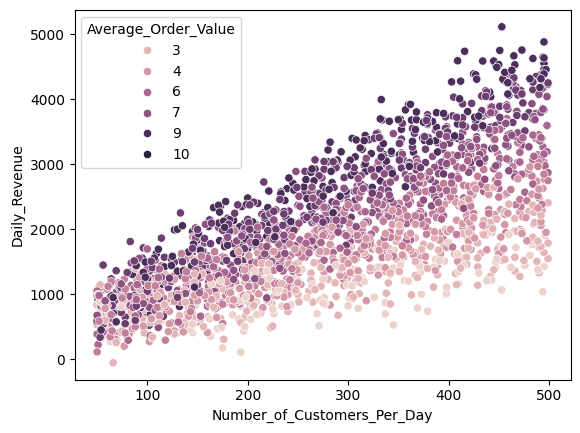

In [169]:
# Number_Of_Customers_Per_Day VS Daily_Revenue

sns.scatterplot(data=df,x='Number_of_Customers_Per_Day', y='Daily_Revenue',hue='Average_Order_Value')

In [170]:
# Observations
# As the number of customers per day increases then the daily revenue generally increases
# From average order value we can clearly say that higher average order value will recent in higher daily revenue

<Axes: xlabel='Average_Order_Value', ylabel='Daily_Revenue'>

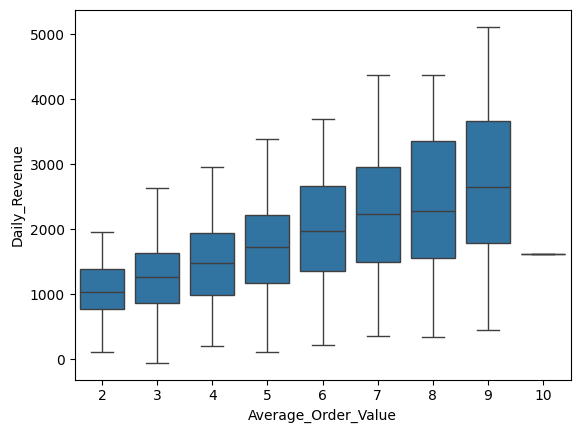

In [171]:
# Average_Order_Value VS Daily_Revenue

sns.boxplot(data=df,x='Average_Order_Value',y='Daily_Revenue')

In [172]:
# Observations
# We can say that if  average order value increases then daily revnue will increase
# both are directy proportional to each other

<Axes: xlabel='Operating_Hours_Per_Day', ylabel='Daily_Revenue'>

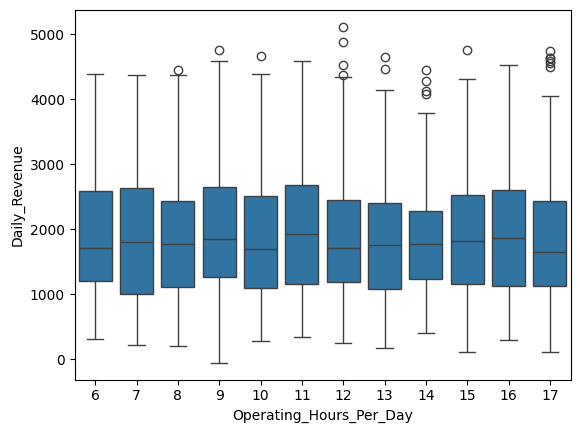

In [173]:
# Operating_Hours_Per_Day VS Daily_Revenue

sns.boxplot(data=df,x='Operating_Hours_Per_Day', y='Daily_Revenue')

In [174]:
# Observations
# Operating hours per day increases then daily revenue will increase
# There are some outliers

<Axes: xlabel='Number_of_Employees', ylabel='Daily_Revenue'>

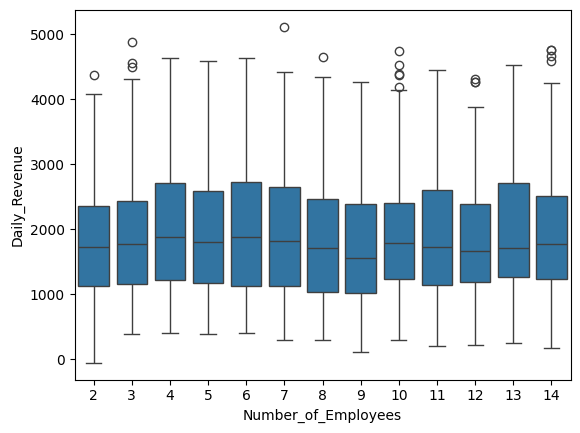

In [175]:
# Number_of_Employees VS Daily_Revenue

sns.boxplot(data=df,x='Number_of_Employees', y='Daily_Revenue')

In [176]:
# Observations
# there is no clear pattern between number of employees and daily revenue
# increasing the number of employees doesnot increase daily revenue

<Axes: xlabel='Marketing_Spend_Per_Day', ylabel='Daily_Revenue'>

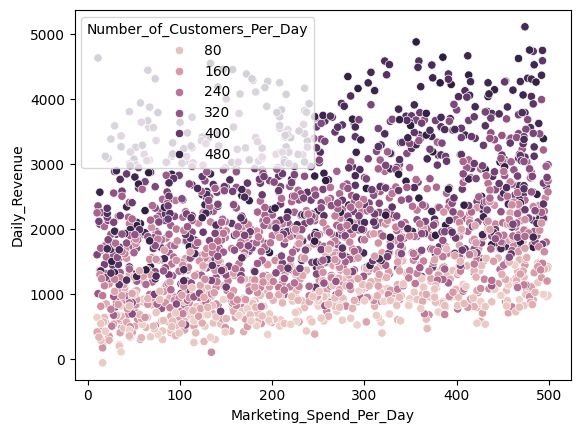

In [177]:
# Marketing_Spend_Per_Day

sns.scatterplot(data=df,x='Marketing_Spend_Per_Day', y='Daily_Revenue',hue='Number_of_Customers_Per_Day')

In [178]:
# Observations
# Marketing spend per day increases then dailyrevenue also increases
# By using number of customers per day we can clearly say that the data points with high revenue is number of customers per day

<Axes: xlabel='Location_Foot_Traffic', ylabel='Daily_Revenue'>

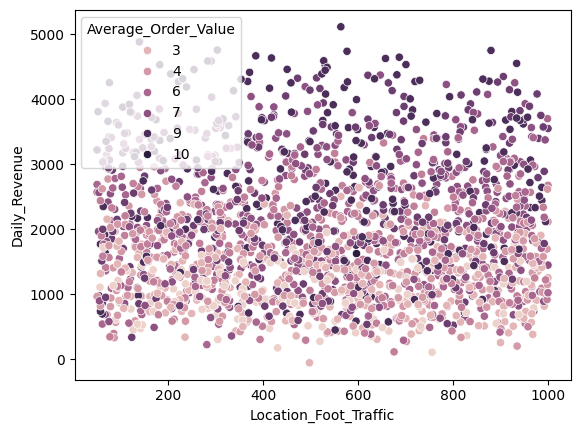

In [179]:
# Location_Foot_Traffic

sns.scatterplot(data=df,x='Location_Foot_Traffic',y='Daily_Revenue',hue='Average_Order_Value')

In [180]:
# Observations
# We can say that higher location foot traffic higher the daily revenue
# the hue shows that the data points that have higher average order value is associated with higher daily revenue
# Both location foot traffic and average order value higher the values higher daily revenue

##  7. Multivariate Analysis — *[10 Marks]*
- Use seaborn's `pairplot()` to visualize pairwise relationships
- Discuss any interesting interactions influencing revenue

---

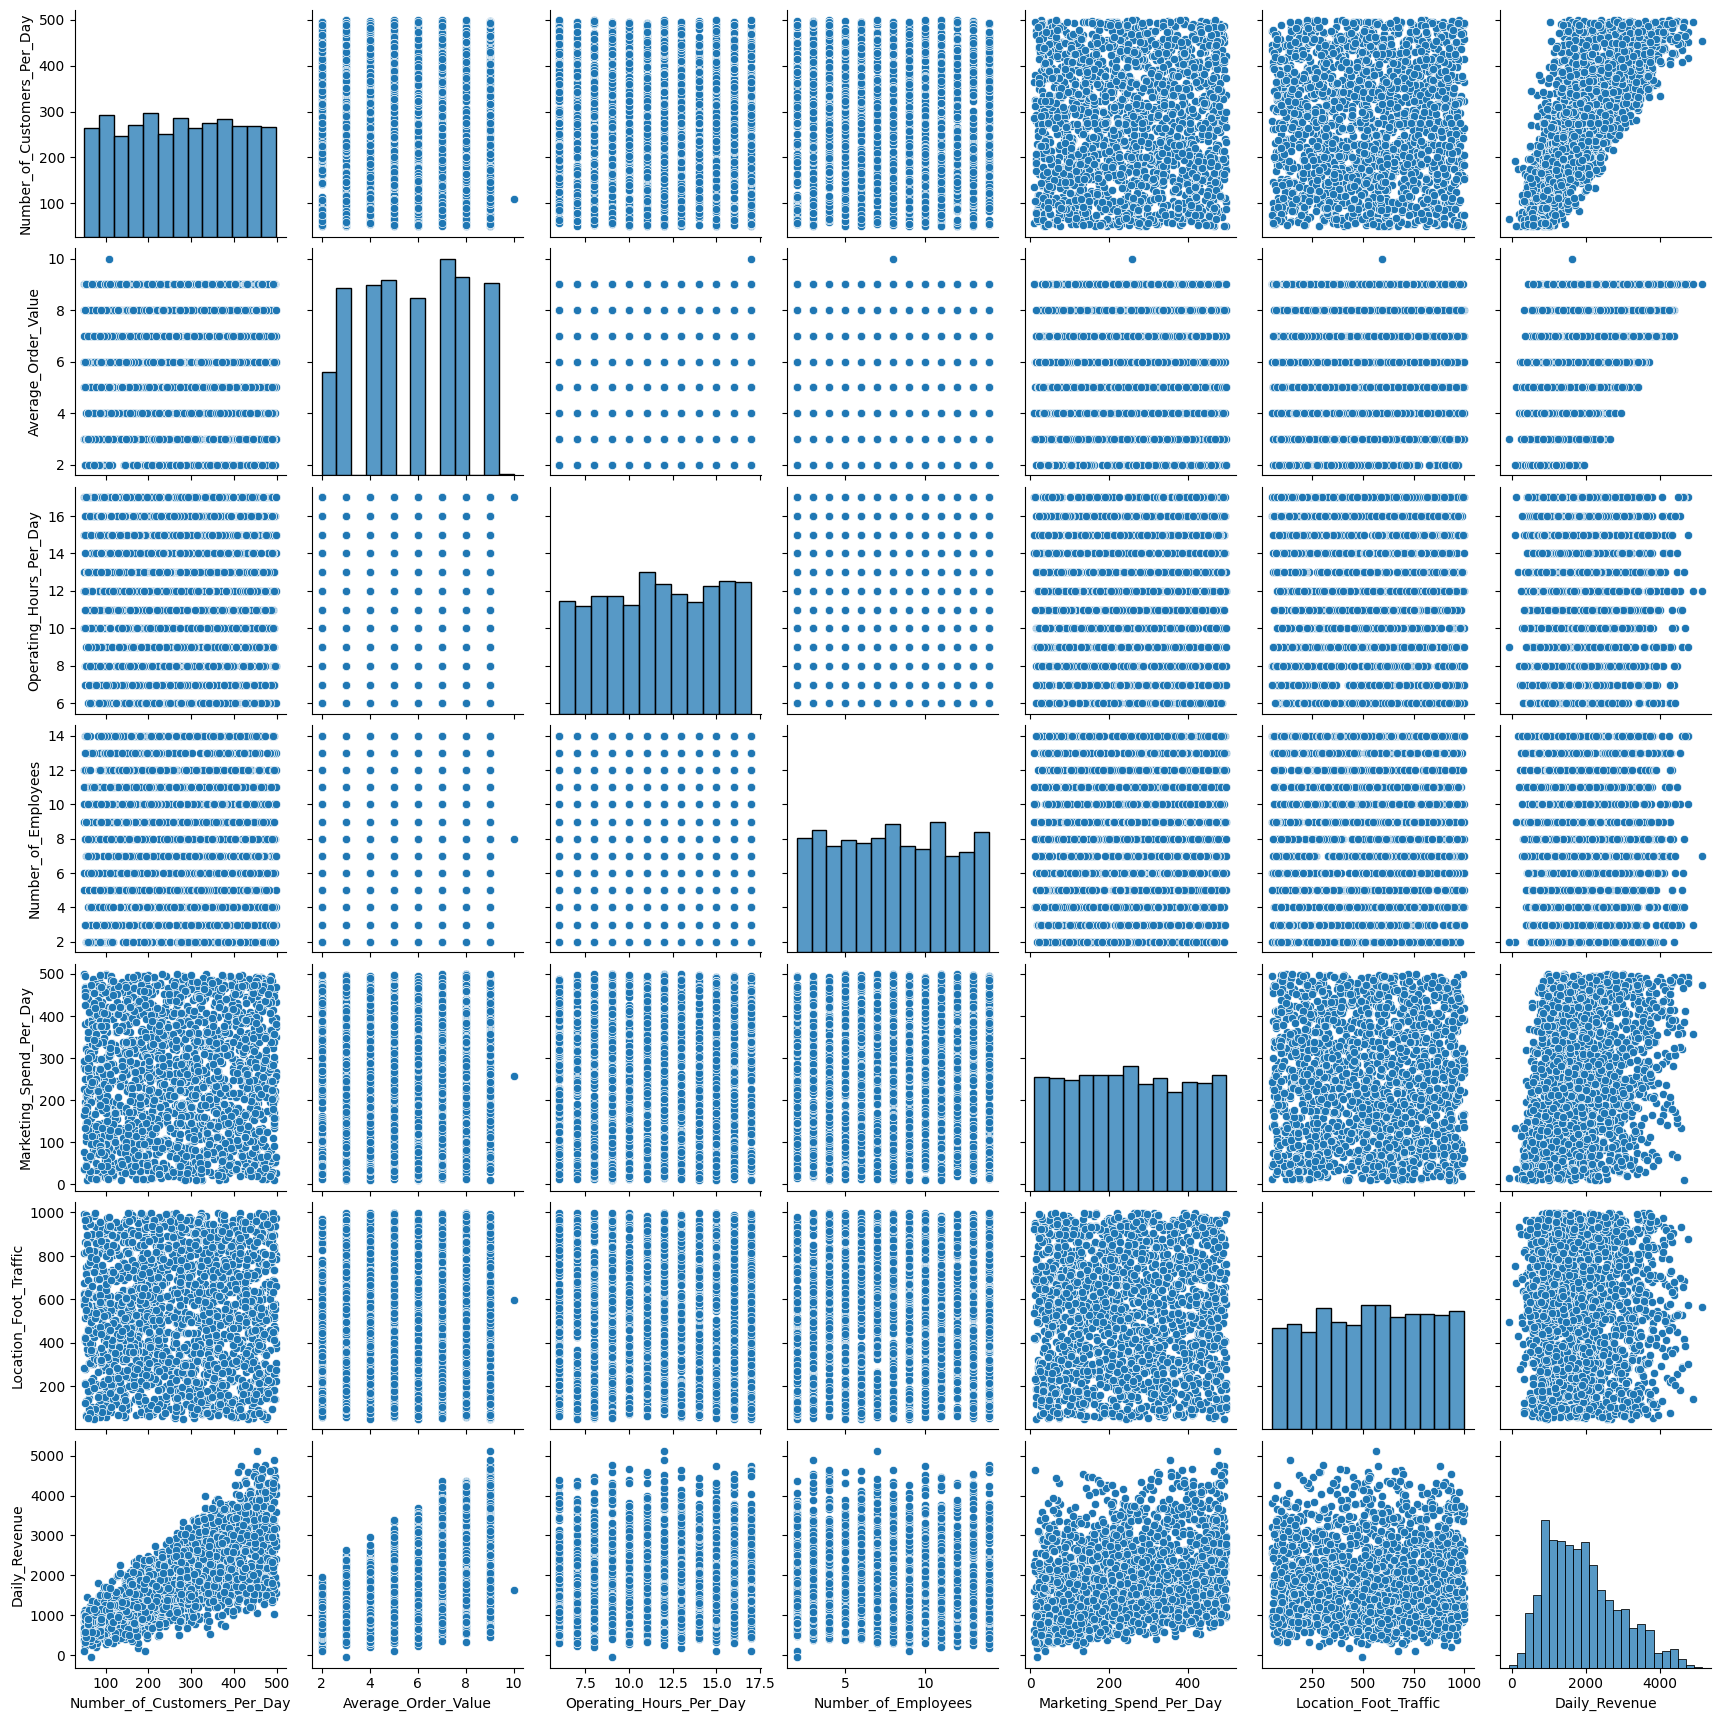

In [181]:
sns.pairplot(df)
plt.show()

In [182]:
# Average order value and number of customers per day clearly says the are proportional to daily revenue
# llocation foot traffic also contribute forincrease in daily revenue

##  8. Heatmap – Correlation Matrix — *[10 Marks]*
- Create a correlation matrix using `.corr()`
- Plot with `seaborn.heatmap()`
- Identify features most correlated with `Daily Revenue`

---

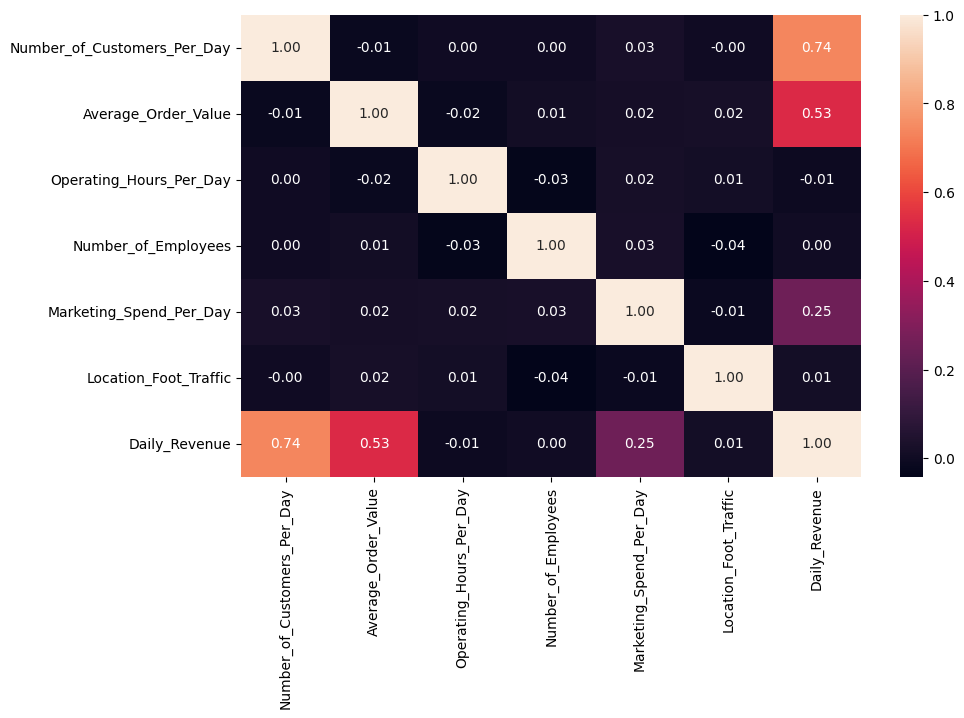

In [183]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [184]:
# Number of customers per day and average order value is more correalted to daily revenue

##  10. Feature Scaling — *[5 Marks]*
- Standardize or normalize the dataset using:
  - `StandardScaler` or `MinMaxScaler`
- Justify why scaling is needed before model building

---

In [185]:
from sklearn.preprocessing import StandardScaler

# Standardization
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(df.drop('Daily_Revenue', axis=1))
df_standardized = pd.DataFrame(X_standardized, columns=df.drop('Daily_Revenue', axis=1).columns)
df_standardized['Daily_Revenue'] = df['Daily_Revenue']



##  11. Model Building — *[50 Marks]*
Implement the following **regression models**:

1. **Linear Regression**
2. **K-Nearest Neighbors Regressor (KNN)**
3. **Decision Tree Regressor**
4. **Support Vector Regressor (SVR)**
5. **Random Forest Regressor**
6. **Bagging Regressor**
7. **AdaBoost Regressor**
8. **Gradient Boosting Regressor**
9. **XGBoost Regressor**
10. **Stacking Regressor**
11. **Voting Regressor**
12. **Neural Network Regressor** (`MLPRegressor` or using `Keras`)



---

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [187]:
X = df.drop(columns='Daily_Revenue')
y = df['Daily_Revenue']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base regressors
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}

# Stacking and Voting
stacking = StackingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
], final_estimator=LinearRegression())

voting = VotingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
])

# Add ensemble models
models["Stacking"] = stacking
models["Voting"] = voting

# Evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} - MSE: {mse:.4f}")
    mae = mean_absolute_error(y_test, preds)
    print(f"{name} - MAE: {mse:.4f}")
    rmse = np.sqrt(mse)
    print(f"{name} - RMSE: {mse:.4f}")
    r2 = r2_score(y_test, preds)
    print("R-squared Score:", r2)

Linear Regression - MSE: 103614.6415
Linear Regression - MAE: 103614.6415
Linear Regression - RMSE: 103614.6415
R-squared Score: 0.8891069383527197
KNN - MSE: 415518.2565
KNN - MAE: 415518.2565
KNN - RMSE: 415518.2565
R-squared Score: 0.5552936250647875
Decision Tree - MSE: 96718.0050
Decision Tree - MAE: 96718.0050
Decision Tree - RMSE: 96718.0050
R-squared Score: 0.8964880297756165
SVR - MSE: 873714.8745
SVR - MAE: 873714.8745
SVR - RMSE: 873714.8745
R-squared Score: 0.06491094318299495
Random Forest - MSE: 56520.9063
Random Forest - MAE: 56520.9063
Random Forest - RMSE: 56520.9063
R-squared Score: 0.9395087773810616
Bagging - MSE: 62316.7857
Bagging - MAE: 62316.7857
Bagging - RMSE: 62316.7857
R-squared Score: 0.9333057659134131
AdaBoost - MSE: 79237.7821
AdaBoost - MAE: 79237.7821
AdaBoost - RMSE: 79237.7821
R-squared Score: 0.9151961525256853
Gradient Boosting - MSE: 52836.3562
Gradient Boosting - MAE: 52836.3562
Gradient Boosting - RMSE: 52836.3562
R-squared Score: 0.943452149079

##  12. Model Evaluation — *[20 Marks]*
Evaluate all models using:
- **MAE** (Mean Absolute Error)
- **MSE** (Mean Squared Error)
- **RMSE**
- **R² Score**

 Create a comparison plot of model performances.

---

Training Linear Regression...
Training KNN...
Training Decision Tree...
Training SVR...
Training Random Forest...
Training Bagging...
Training AdaBoost...
Training Gradient Boosting...
Training XGBoost...
Training Stacking...
Training Voting...
                Model         MAE            MSE        RMSE  R² Score
0   Linear Regression  252.553489  103614.641549  321.892283  0.889107
1                 KNN  507.060500  415518.256500  644.607056  0.555294
2       Decision Tree  248.417500   99657.207500  315.685298  0.893342
3                 SVR  748.721332  873714.874489  934.727166  0.064911
4       Random Forest  192.033375   56045.396308  236.739089  0.940018
5             Bagging  201.013250   62643.493675  250.286823  0.932956
6            AdaBoost  229.357084   82698.633023  287.573700  0.911492
7   Gradient Boosting  186.788644   52847.640554  229.886147  0.943440
8             XGBoost  206.247025   65963.976562  256.834531  0.929402
9            Stacking  185.352731   51820.229

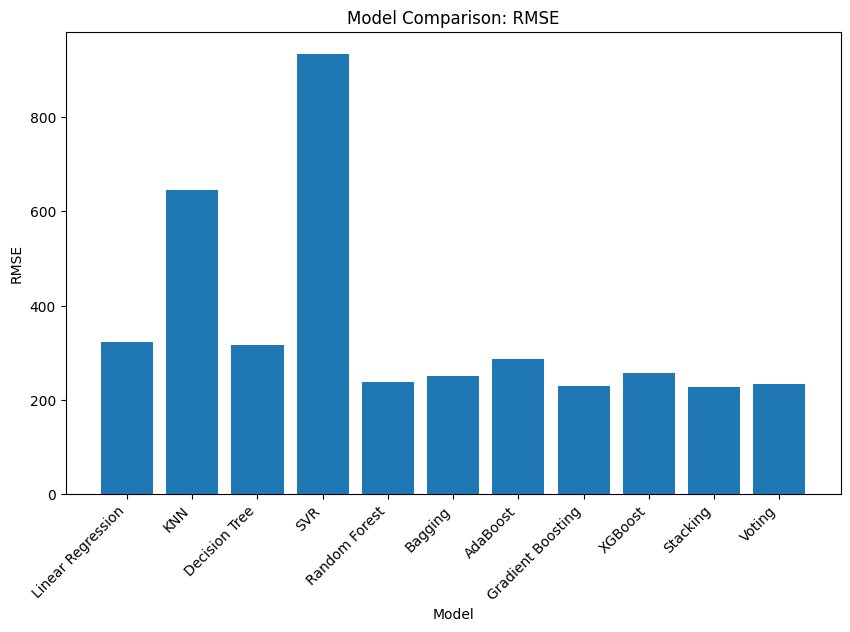

In [189]:
performance_metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R² Score': []
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    if model_name in ['KNN', 'SVR', 'MLP (Neural Network)']:
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    performance_metrics['Model'].append(model_name)
    performance_metrics['MAE'].append(mae)
    performance_metrics['MSE'].append(mse)
    performance_metrics['RMSE'].append(rmse)
    performance_metrics['R² Score'].append(r2)


df_performance = pd.DataFrame(performance_metrics)
print(df_performance)
plt.figure(figsize=(10, 6))
plt.bar(df_performance['Model'], df_performance['RMSE'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45, ha='right')
plt.show()

##  13. Interpretation of Metrics — *[10 Marks]*
- Explain what each metric means
- Discuss pros and cons of MAE vs RMSE
- Which metric is most relevant for predicting business revenue?

---

1. Mean Squared Error (MSE)
- The average of the squared differences between the predicted and actual values

2. Root Mean Squared Error (RMSE)
- The square root of the MSE.

3. Mean Absolute Error (MAE)
- The average of the absolute differences between the predicted and actual values

4. R-squared (R2)
- The proportion of the variance in the target variable that is explained by the model

MAE

Pros:
- Robustness to Outliers
- Interpretability
- Scale Dependency

Cons:
- Mathematical Properties
- Sensitive to small errors

RMSE
Pros:
- Mathematical Properties
- Sensitivity to Large Errors
- Widely used

cons:
- Sensitive to outliers
- Inerpretability
- Scale independency

- RMSE is often the most relevant metric for predicting business revenue due to its sensitivity to larger errors and common usage, it's essential to consider the specific business context, compare multiple metrics, and communicate clearly to make informed decisions.


##  14. Final Conclusion — *[10 Marks]*
- Which model performed best and why?
- What could improve the performance? (e.g., more data, better features, hyperparameter tuning)

---



In [190]:
# Gradient boosting is the best model with less RMSE value
# Consider using ensemble methods to combine the best-performing models.
# Handle outliers carefully, especially in sensitive models like SVR.